## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

# For metrics and splitting data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# For model tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Loading the dataset

In [2]:
#loading the train and test dataset
train_data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Model Tuning\Project 6\Train.csv")
test_data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Model Tuning\Project 6\Test.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# Viewing first five rows of the dataset
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [4]:
# Viewing last five rows of the dataset
train_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


In [5]:
# Getting the number of rows and columns
train_data.shape

(20000, 41)

In [6]:
# Looking at the column data types and counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [7]:
# Getting the statistical summary
pd.set_option('display.float_format', lambda x: '%.1f' %x)
train_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.0,19982.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,-0.3,0.4,2.5,-0.1,-0.1,-1.0,-0.9,-0.5,-0.0,-0.0,-1.9,1.6,1.6,-1.0,-2.4,-2.9,-0.1,1.2,1.2,0.0,-3.6,1.0,-0.4,1.1,-0.0,1.9,-0.6,-0.9,-1.0,-0.0,0.5,0.3,0.0,-0.5,2.2,1.5,0.0,-0.3,0.9,-0.9,0.1
std,3.4,3.2,3.4,3.4,2.1,2.0,1.8,3.3,2.2,2.2,3.1,2.9,2.9,1.8,3.4,4.2,3.3,2.6,3.4,3.7,3.6,1.7,4.0,3.9,2.0,3.4,4.4,1.9,2.7,3.0,3.5,5.5,3.6,3.2,2.9,3.8,1.8,3.9,1.8,3.0,0.2
min,-11.9,-12.3,-10.7,-15.1,-8.6,-10.2,-7.9,-15.7,-8.6,-9.9,-14.8,-12.9,-13.2,-7.7,-16.4,-20.4,-14.1,-11.6,-13.5,-13.9,-18.0,-10.1,-14.9,-16.4,-8.2,-11.8,-14.9,-9.3,-12.6,-14.8,-13.7,-19.9,-16.9,-18.0,-15.3,-14.8,-5.5,-17.4,-6.4,-11.0,0.0
25%,-2.7,-1.6,0.2,-2.3,-1.5,-2.3,-2.0,-2.6,-1.5,-1.4,-3.9,-0.4,-0.2,-2.2,-4.4,-5.6,-2.2,-0.4,-1.1,-2.4,-5.9,-0.1,-3.1,-1.5,-1.4,-0.3,-3.7,-2.2,-2.8,-1.9,-1.8,-3.4,-2.2,-2.1,0.3,-0.9,-1.3,-3.0,-0.3,-2.9,0.0
50%,-0.7,0.5,2.3,-0.1,-0.1,-1.0,-0.9,-0.4,-0.1,0.1,-1.9,1.5,1.6,-1.0,-2.4,-2.7,-0.0,0.9,1.3,0.0,-3.5,1.0,-0.3,1.0,0.0,2.0,-0.9,-0.9,-1.2,0.2,0.5,0.1,-0.1,-0.3,2.1,1.6,-0.1,-0.3,0.9,-0.9,0.0
75%,1.8,2.5,4.6,2.1,1.3,0.4,0.2,1.7,1.4,1.5,0.1,3.6,3.5,0.3,-0.4,-0.1,2.1,2.6,3.5,2.5,-1.3,2.0,2.5,3.5,1.4,4.1,2.2,0.4,0.6,2.0,2.7,3.8,2.3,1.4,4.1,4.0,1.2,2.3,2.1,1.1,0.0
max,15.5,13.1,17.1,13.2,8.1,7.0,8.0,11.7,8.1,8.1,11.8,15.1,15.4,5.7,12.2,13.6,16.8,13.2,13.2,16.1,13.8,7.4,14.5,17.2,8.2,16.8,17.6,6.5,10.7,12.5,17.3,23.6,16.7,14.4,15.3,19.3,7.5,15.3,7.8,10.7,1.0


In [8]:
# Checking for duplicate values
train_data.duplicated().sum()

0

In [9]:
# Checking for null values in train set
train_data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [10]:
# Checking for null values in t set
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [11]:
# Copying original dataset
df = train_data.copy()

## Exploratory Data Analysis (EDA)

**Univariate Analysis**

In [12]:
# Function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color = "thistle") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  color = "thistle")
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

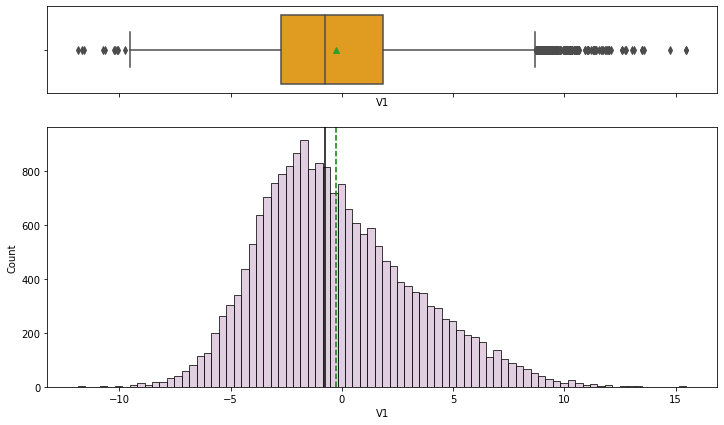

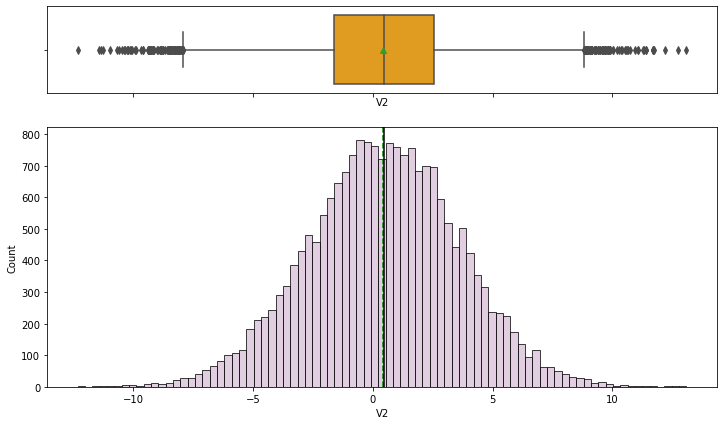

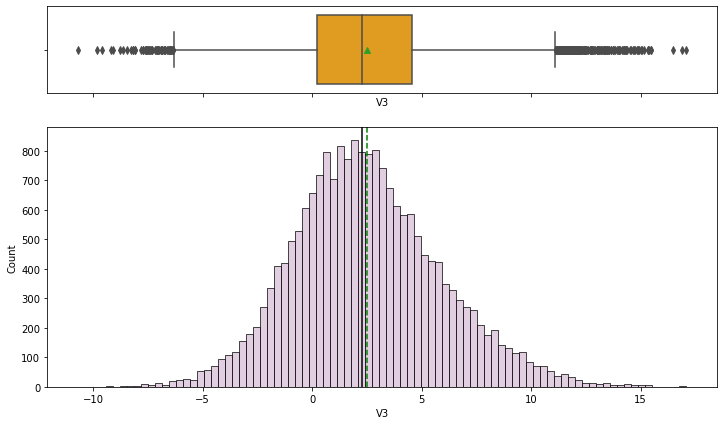

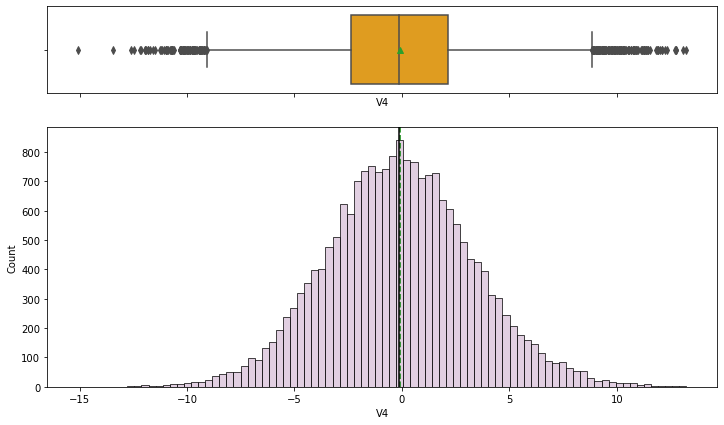

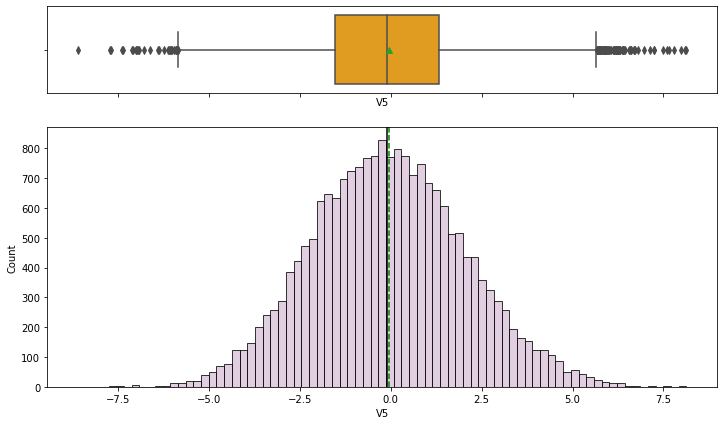

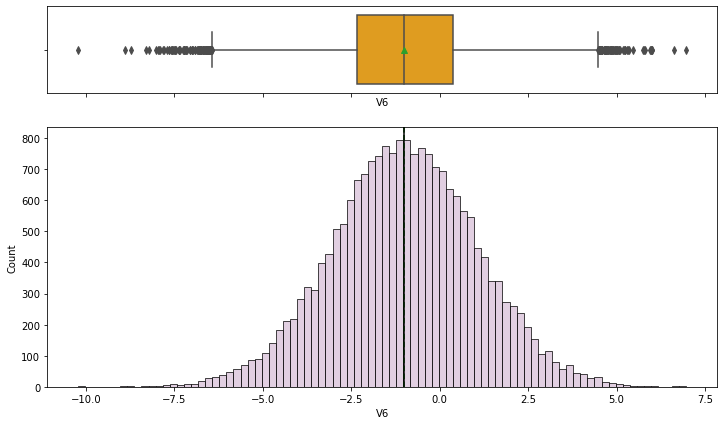

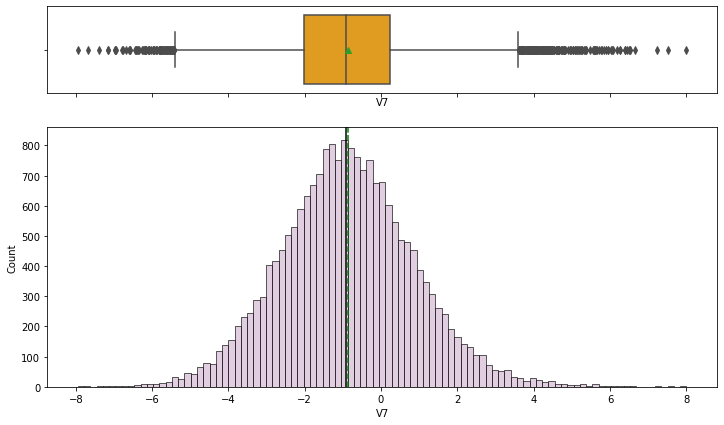

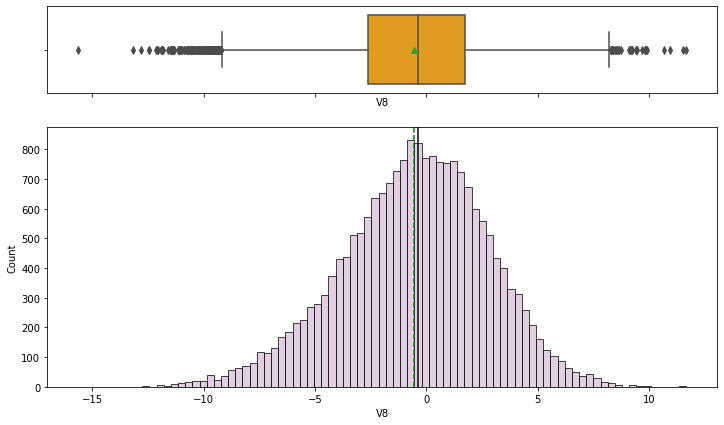

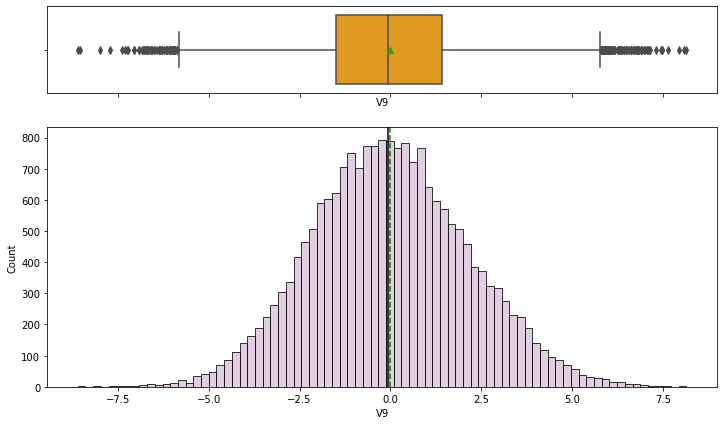

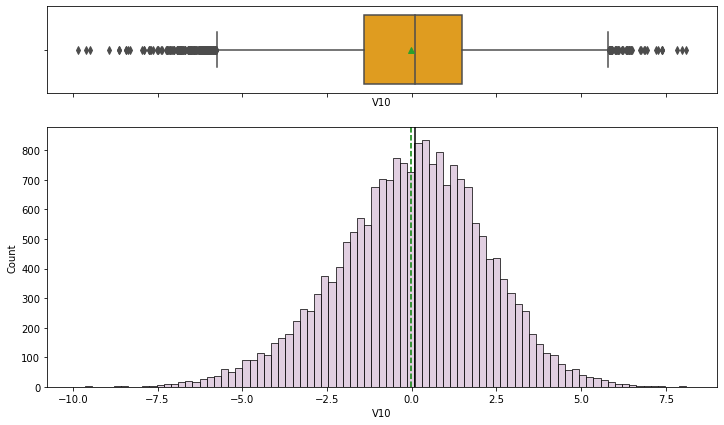

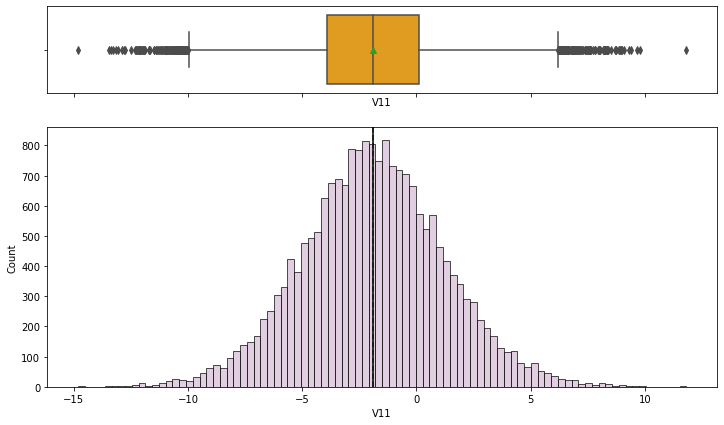

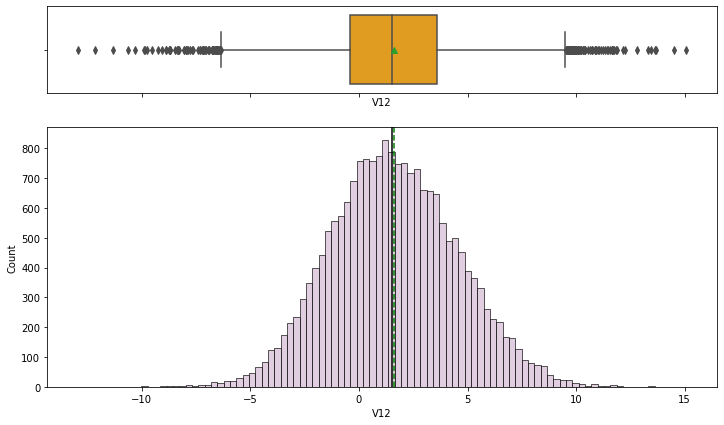

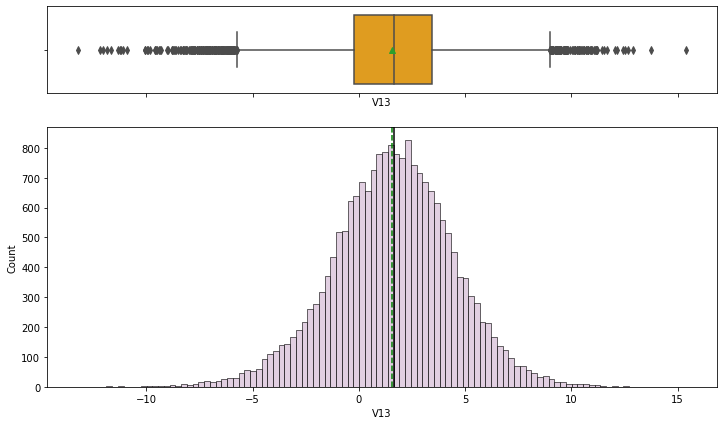

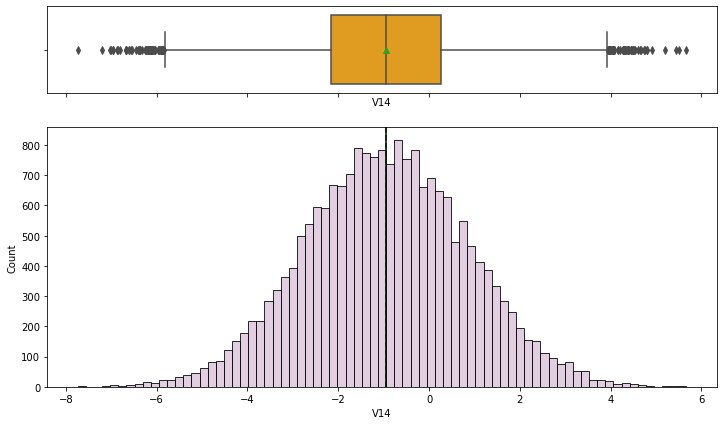

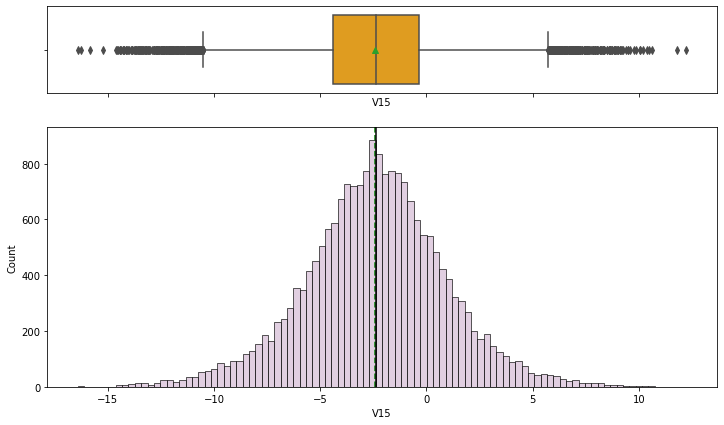

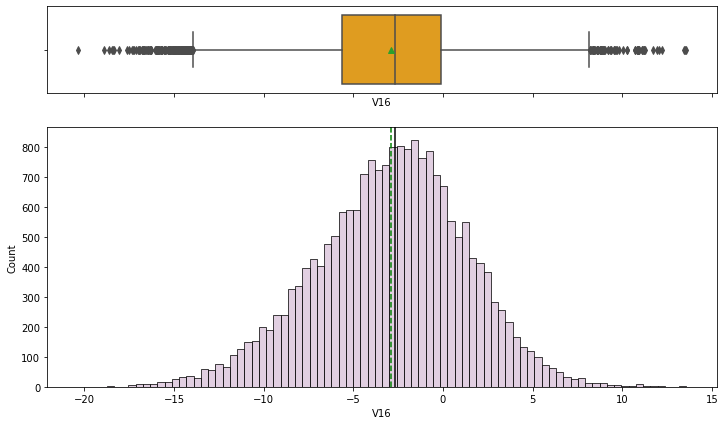

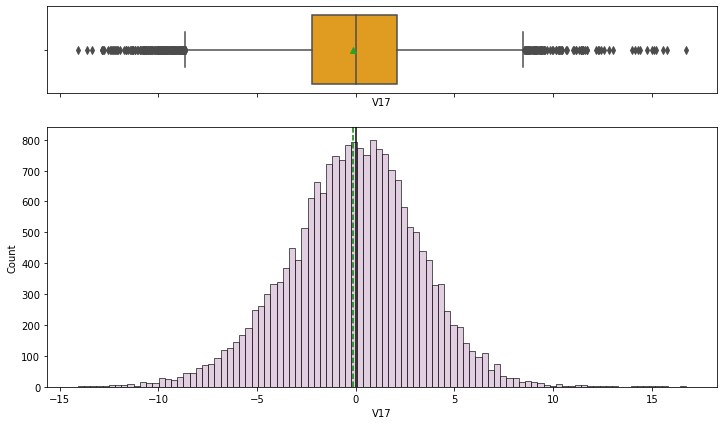

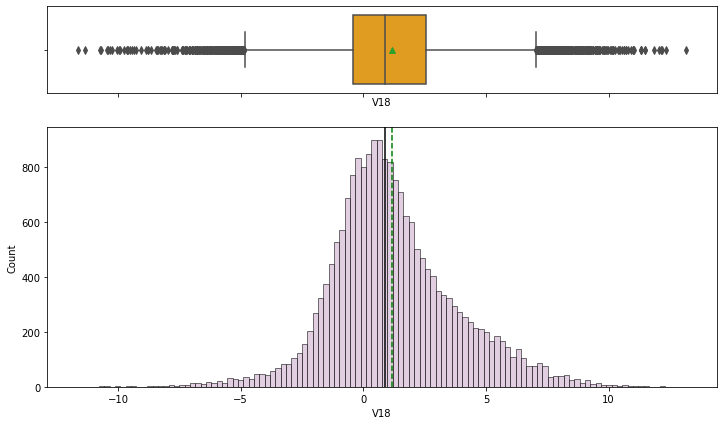

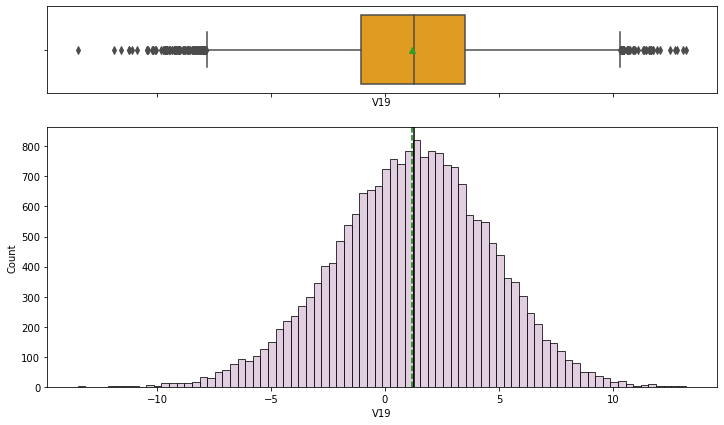

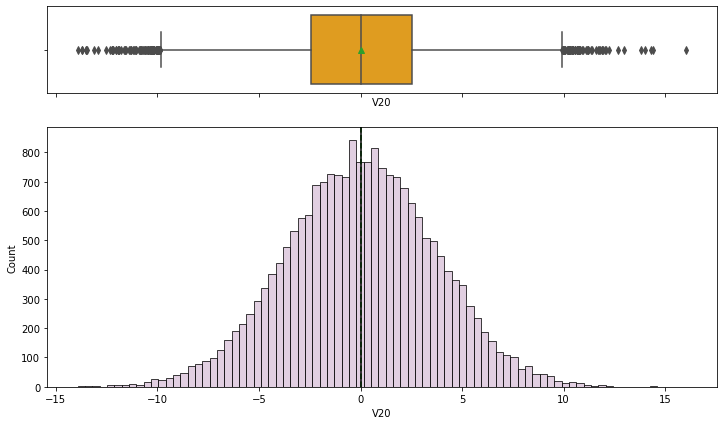

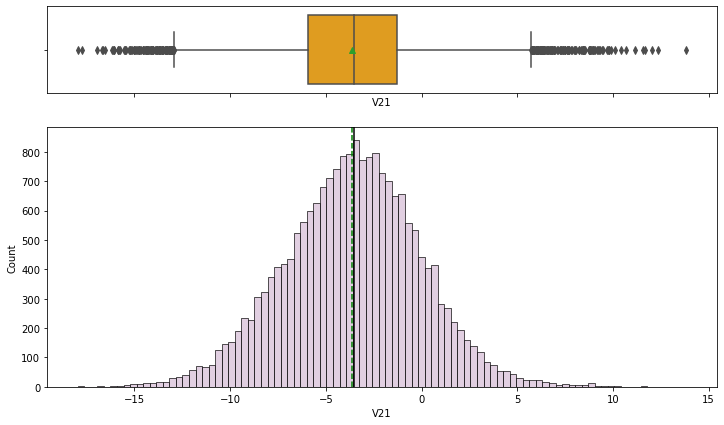

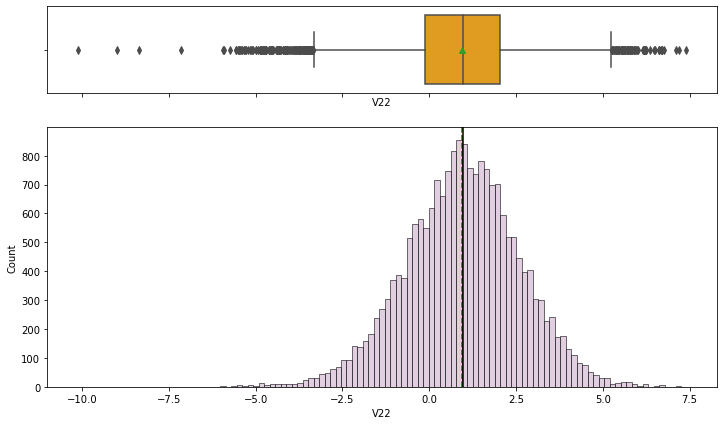

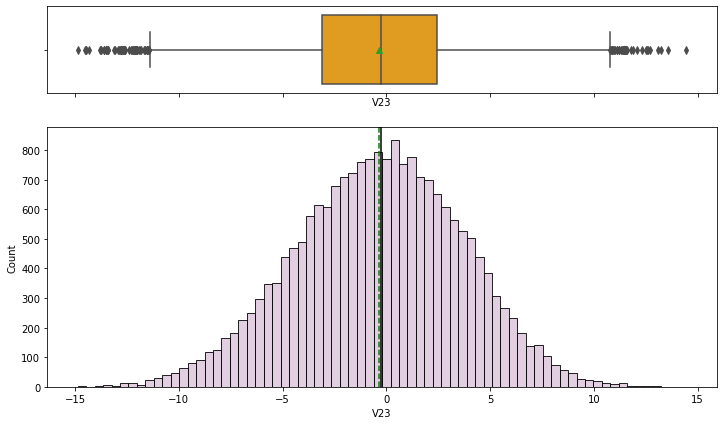

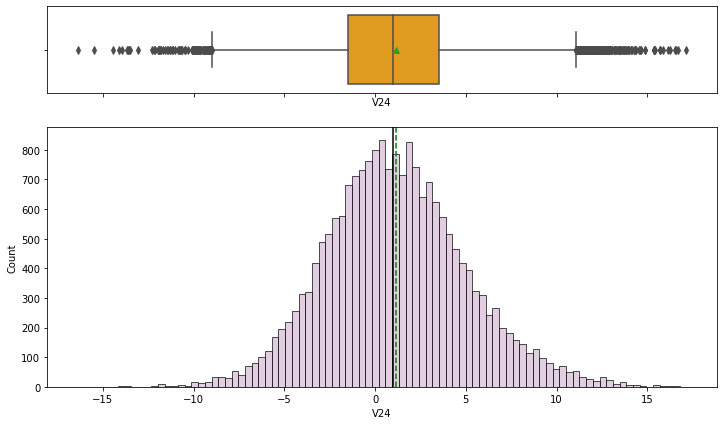

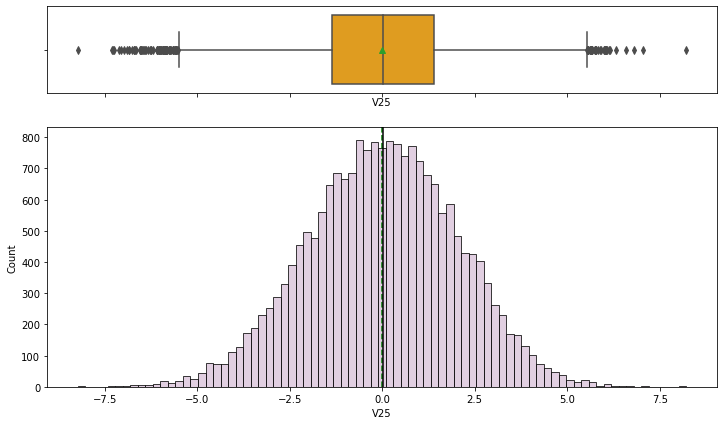

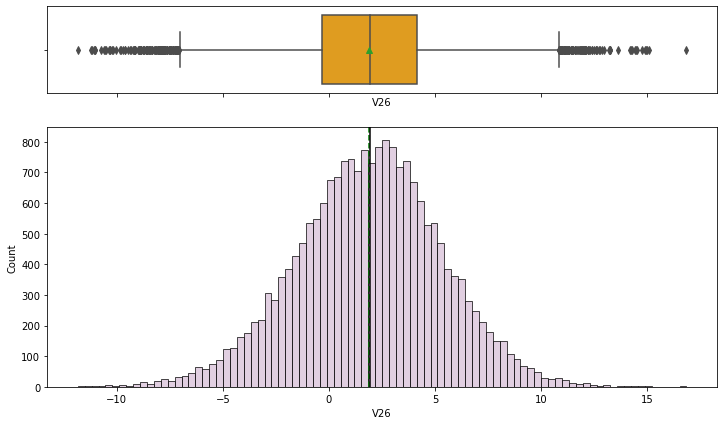

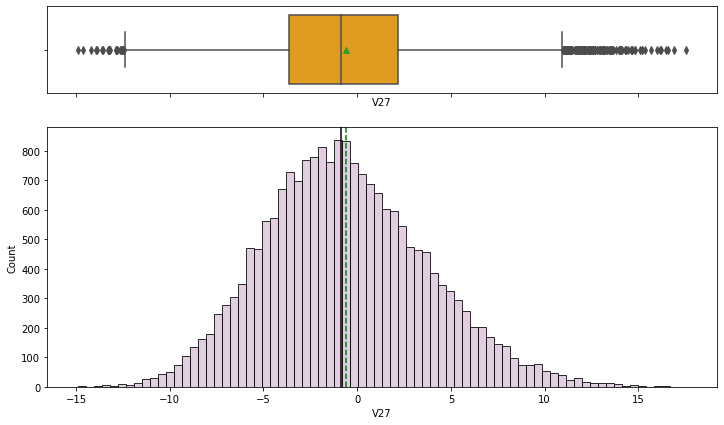

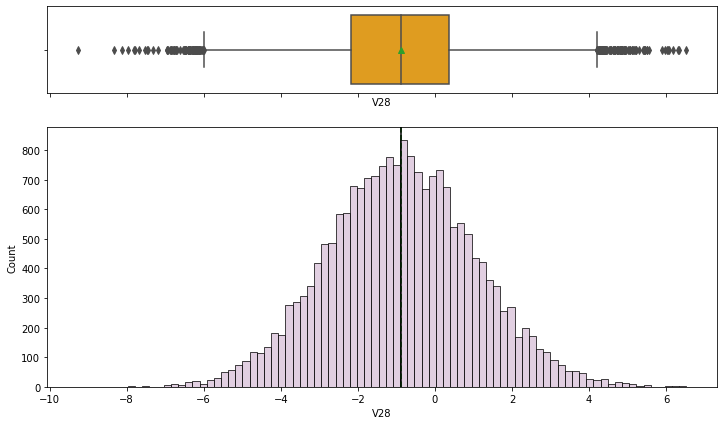

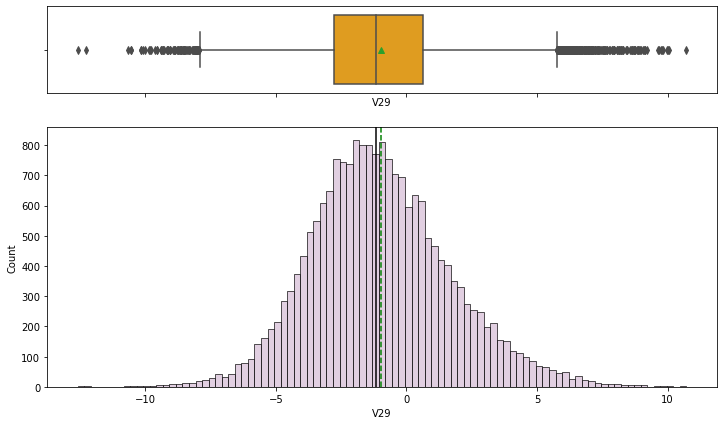

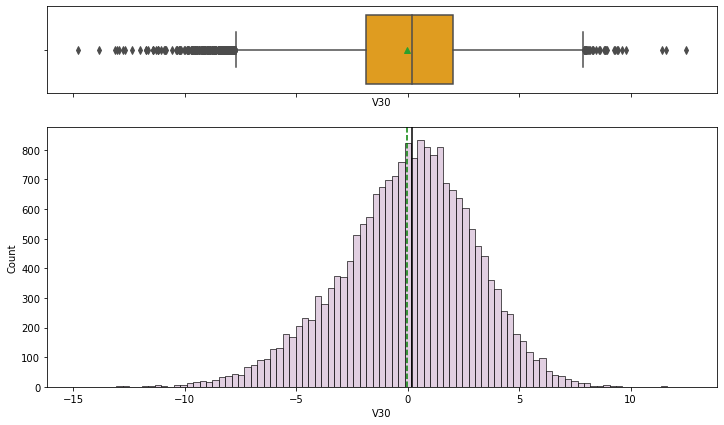

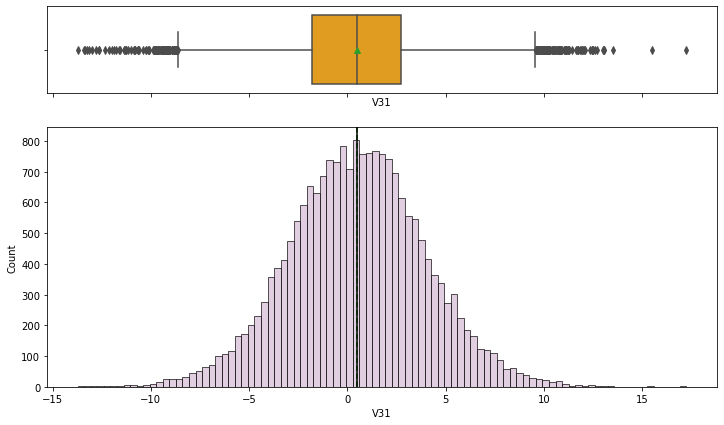

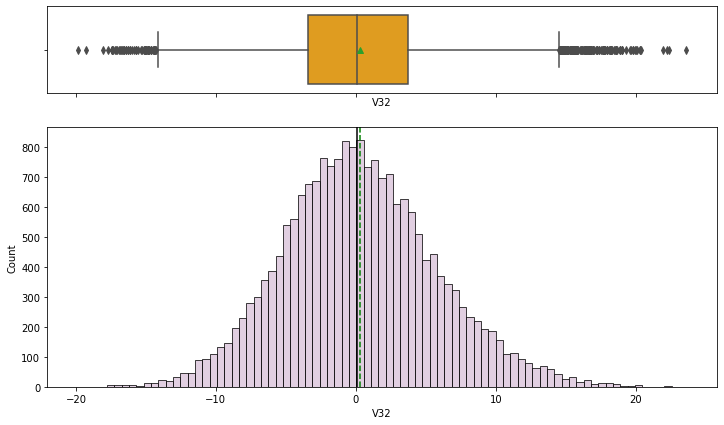

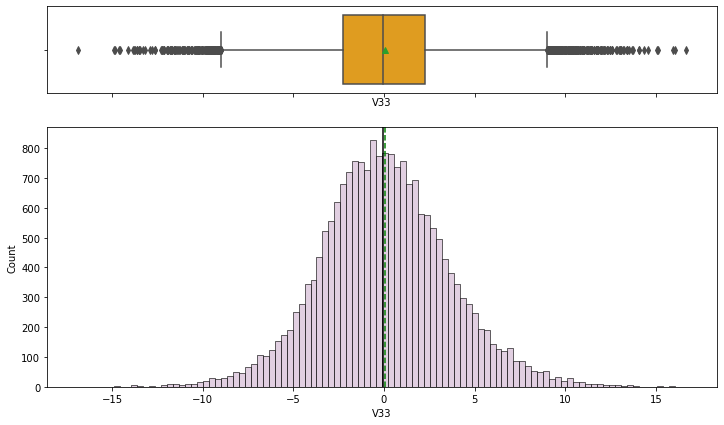

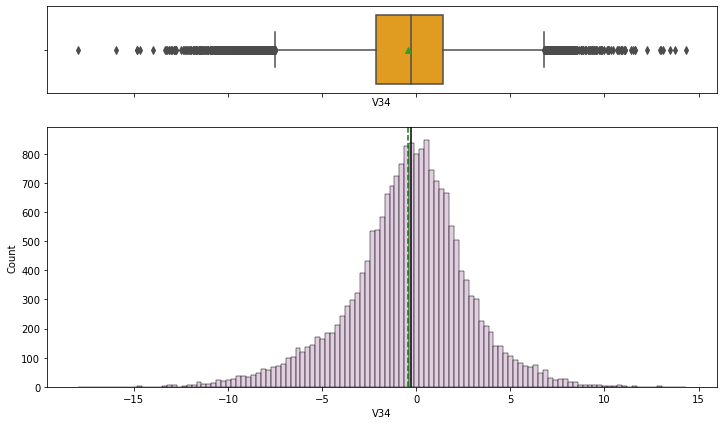

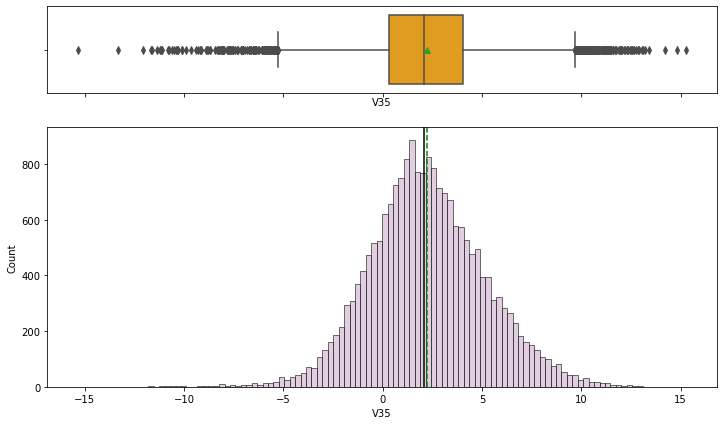

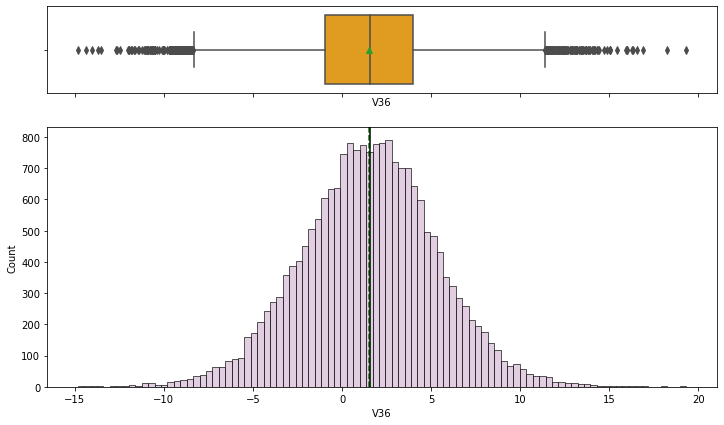

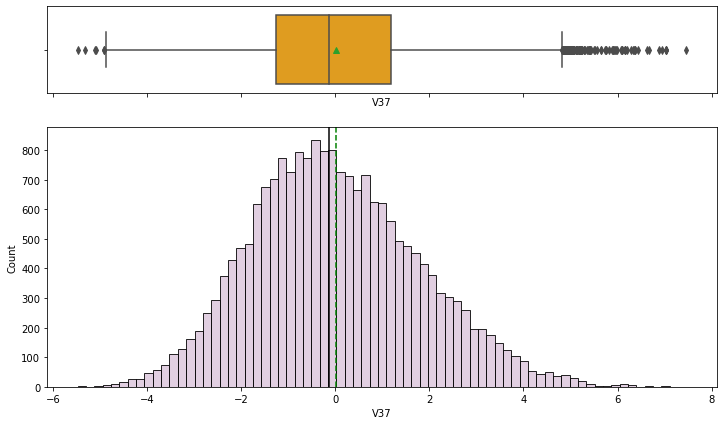

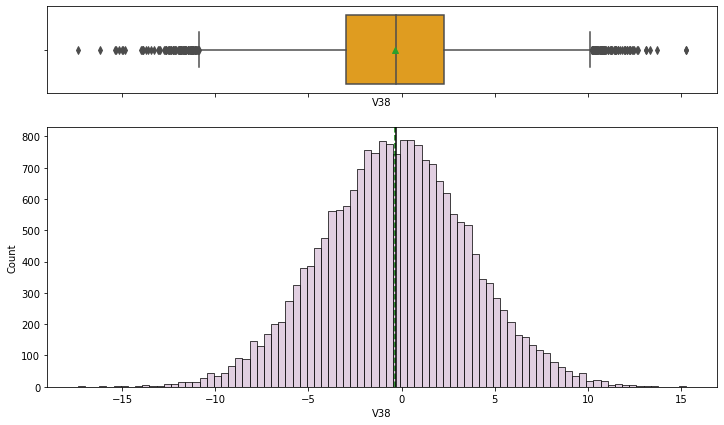

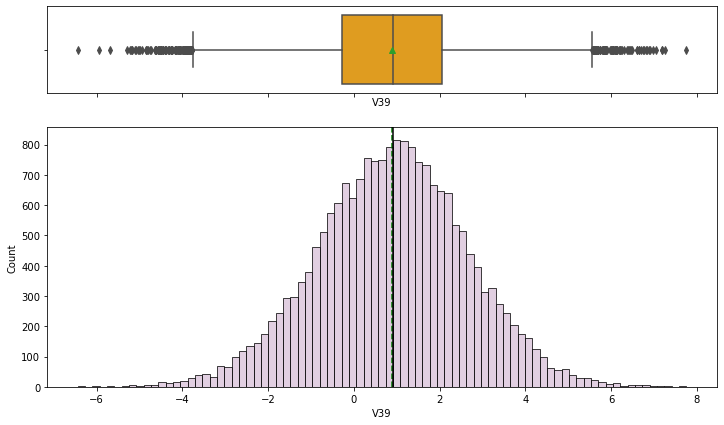

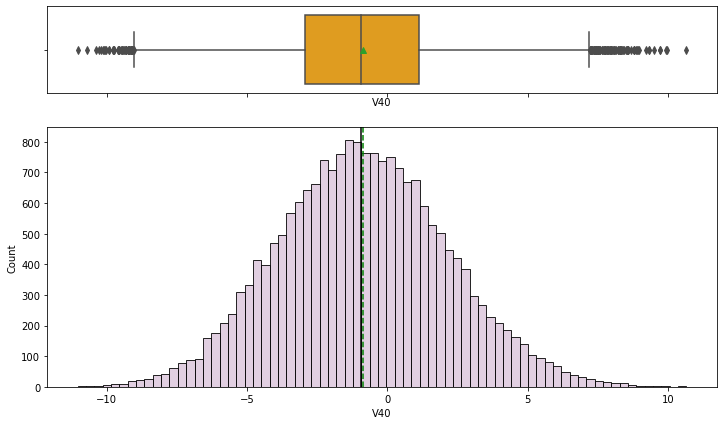

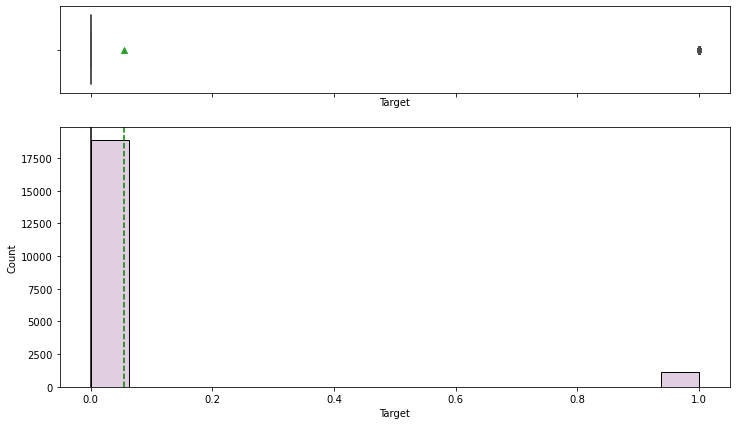

In [13]:
# Plotting data
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

**Bivariate Analysis**

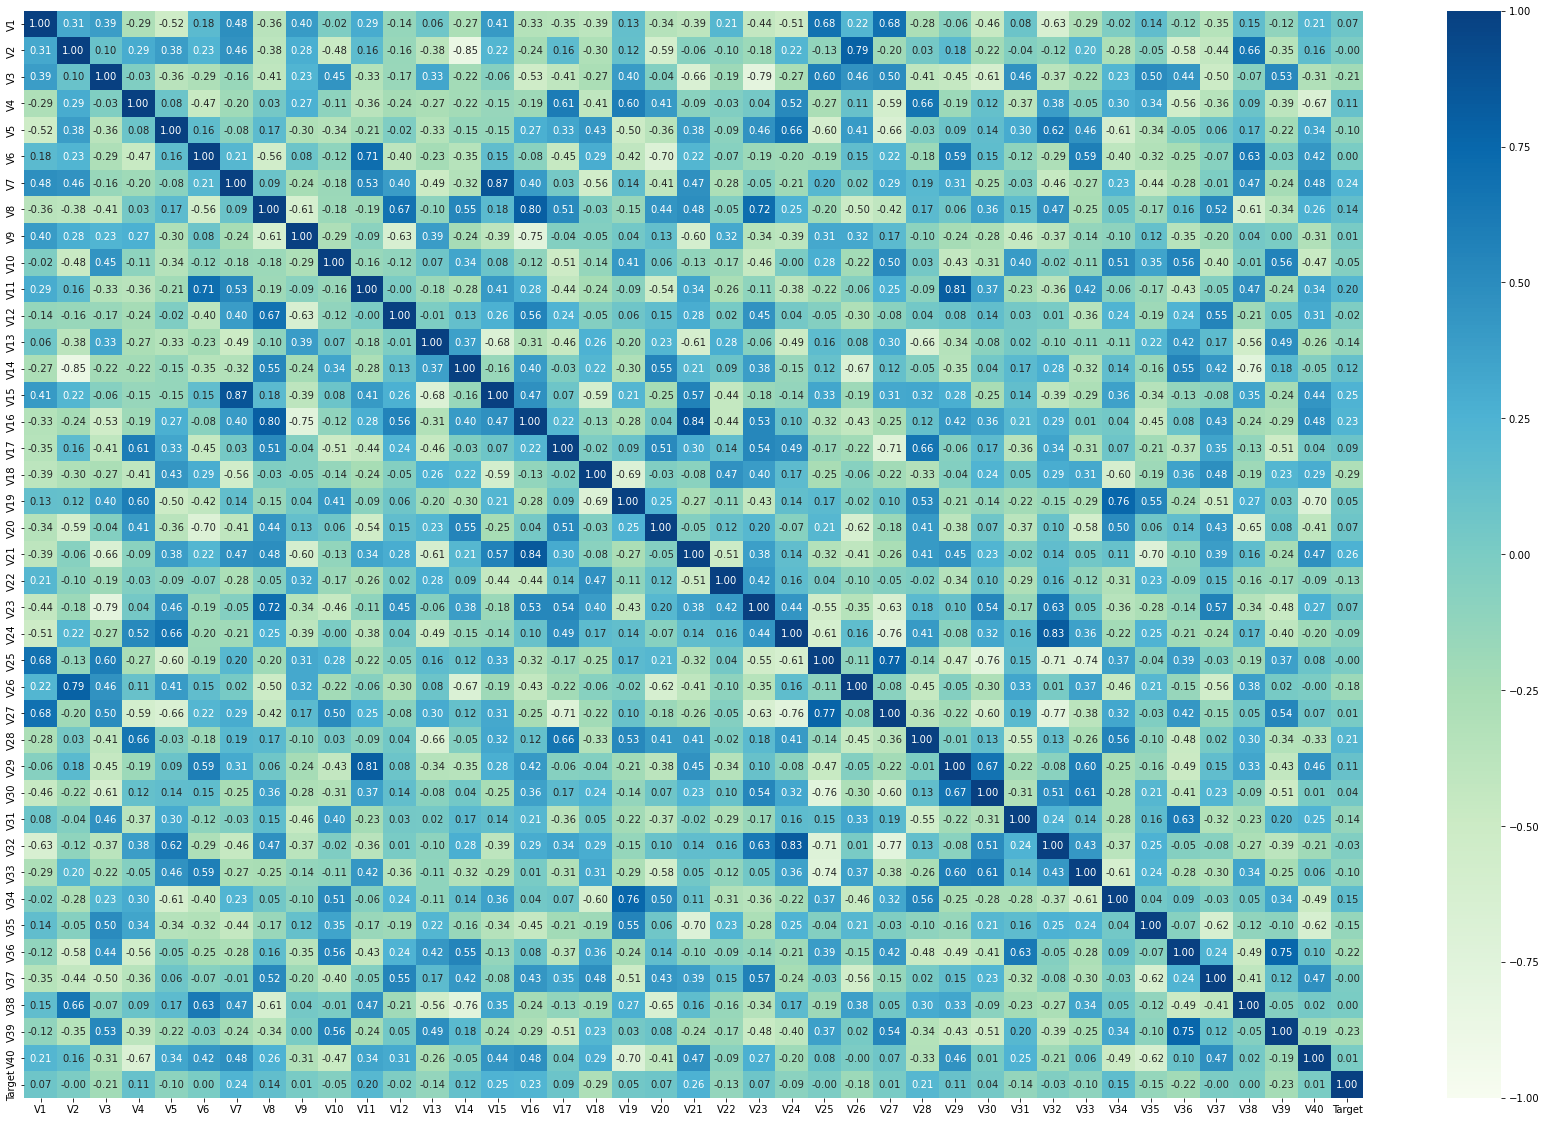

In [14]:
# Plotting correlation heatmap
cols_list = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(30, 20))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
plt.show()

In [15]:
print("Values of class distribution in train data:")
print(df["Target"].value_counts())

print("Percentage of class distribution in train data:")
print(df["Target"].value_counts(normalize=True))

Values of class distribution in train data:
0    18890
1     1110
Name: Target, dtype: int64
Percentage of class distribution in train data:
0   0.9
1   0.1
Name: Target, dtype: float64


In [16]:
print("Values of class distribution in test data:")
print(test_data["Target"].value_counts())
print("-"*50)
print("Percentage of class distribution in test data:")
print(test_data["Target"].value_counts(normalize=True))

Values of class distribution in test data:
0    4718
1     282
Name: Target, dtype: int64
--------------------------------------------------
Percentage of class distribution in test data:
0   0.9
1   0.1
Name: Target, dtype: float64


### EDA Comments
- All variables seem to follow a normal distribution pattern.
- The mean and median for majority of the variables fall around the value 0.
- There are some outliers on the lower and upper ends consistent across all the variables (except the target variable which is either 1 or 0).
- We can expect variation on either side of all "technical problems" depending on the type of sensors and what they measure, so we will not treat the outliers.
- The correlation heatmap shows many variables with high positive and negative correlation.
  
  The following variables have a high positive correlation (>=0.8):
    - V7 and V15
    - V8 and V16
    - V11 and V29
    - V16 and V21
    - V24 and V32
    
  The following variables have a high negative correlation (<=-0.75):
    - V2 and V14
    - V3 and V23
- Both train and test datasets have 90:10 class distribution ratio between non-failures and failures, showing that failures account for 10% in the data provided.

## Data Pre-Processing

In [17]:
# Preparing train data into X and y
X = df.drop(["Target"], axis=1)
y = df["Target"]

In [18]:
# Preparing test data into X_test and y_test
X_test = test_data.drop(["Target"], axis=1)
y_test = test_data["Target"]

In [19]:
# Splitting train data into training and validation sets (already have a separate test set)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [20]:
# Checking number of rows and columns in all three datasets
print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


## Missing value imputation




In [21]:
# Imputing missing values for V1 and V2 in the data
imputer = SimpleImputer(strategy="median")
cols_to_impute = ['V1', 'V2']

# Fit and transform training data
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
# Transform validation and testing data
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [22]:
# Checking missing values again
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

In [23]:
# Defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred) # to compute Accuracy
    recall = recall_score(target, pred) # to compute Recall
    precision = precision_score(target, pred) # to compute Precision
    f1 = f1_score(target, pred) # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0]
    )
    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

In [24]:
# Setting the metric to maximise
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [25]:
# Creating empty list for all the models
models = []

# Appending models into the list
models.append(("DT", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RF", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("AB", AdaBoostClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

# Creating empty list to store CV scores and names
results = []
names = []
score = []

# Creating a loop for all the models and append it to the empty lists
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=1
    )
    cv_result = cross_val_score(
        estimator=model,
        X=X_train,
        y=y_train,
        scoring=scorer,
        cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

DT: 0.6982829521679532
Bagging: 0.7210807301060529
RF: 0.7235192266070268
GBM: 0.7066661857008874
AB: 0.6309140754635308
XGB: 0.7956208065796118

Validation Performance:

DT: 0.7050359712230215
Bagging: 0.7302158273381295
RF: 0.7266187050359713
GBM: 0.7230215827338129
AB: 0.6762589928057554
XGB: 0.8201438848920863


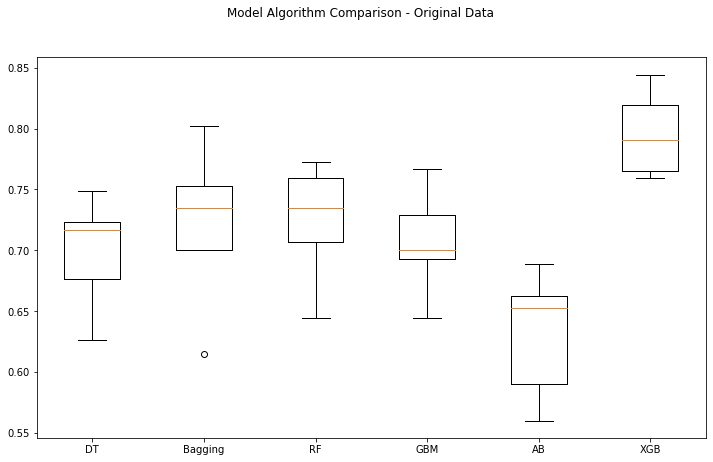

In [26]:
# Plotting boxplots for CV scores of all models
fig = plt.figure(figsize=(12,7))

fig.suptitle("Model Algorithm Comparison - Original Data")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled Data


In [27]:
print("Before Oversampling, counts of label 'Predicted': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Not Predicted': {} \n".format(sum(y_train == 0)))


# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Predicted': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Not Predicted': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Predicted': 832
Before Oversampling, counts of label 'Not Predicted': 14168 

After Oversampling, counts of label 'Predicted': 14168
After Oversampling, counts of label 'Not Predicted': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



In [28]:
# Creating empty list for all the models
models_o = []

# Appending models into the list
models_o.append(("DT", DecisionTreeClassifier(random_state=1)))
models_o.append(("Bagging", BaggingClassifier(random_state=1)))
models_o.append(("RF", RandomForestClassifier(random_state=1)))
models_o.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_o.append(("AB", AdaBoostClassifier(random_state=1)))
models_o.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

# Creating empty list to store CV scores and names
results_o = []
names_o = []
score_o = []

# Creating a loop for all the models and append it to the empty lists
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_o:
    kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=1
    )
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_over,
        y=y_train_over,
        scoring=scorer,
        cv=kfold
    )
    results_o.append(cv_result)
    names_o.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_o:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score_o.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

DT: 0.9720494245534969
Bagging: 0.9762141471581656
RF: 0.9839075260047615
GBM: 0.9256068151319724
AB: 0.8978689011775473
XGB: 0.989554053559209

Validation Performance:

DT: 0.7769784172661871
Bagging: 0.8345323741007195
RF: 0.8489208633093526
GBM: 0.8776978417266187
AB: 0.8561151079136691
XGB: 0.8669064748201439


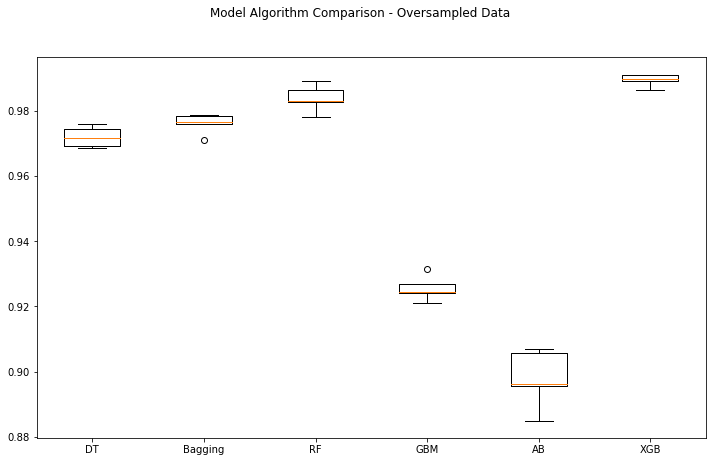

In [29]:
# Plotting boxplots for CV scores of all models
fig = plt.figure(figsize=(12,7))

fig.suptitle("Model Algorithm Comparison - Oversampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results_o)
ax.set_xticklabels(names_o)

plt.show()

### Model Building with Undersampled Data

In [30]:
print("Before UnderSampling, counts of label 'Predicted': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label 'Not Predicted': {} \n".format(sum(y_train == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label 'Predicted': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label 'Not Predicted': {} \n".format(sum(y_train_under == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before UnderSampling, counts of label 'Predicted': 832
Before UnderSampling, counts of label 'Not Predicted': 14168 

After UnderSampling, counts of label 'Predicted': 832
After UnderSampling, counts of label 'Not Predicted': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



In [31]:
# Creating empty list for all the models
models_u = []

# Appending models into the list
models_u.append(("DT", DecisionTreeClassifier(random_state=1)))
models_u.append(("Bagging", BaggingClassifier(random_state=1)))
models_u.append(("RF", RandomForestClassifier(random_state=1)))
models_u.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_u.append(("AB", AdaBoostClassifier(random_state=1)))
models_u.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

# Creating empty list to store CV scores and names
results_u = []
names_u = []
score_u = []

# Creating a loop for all the models and append it to the empty lists
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_u:
    kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=1
    )
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_under,
        y=y_train_under,
        scoring=scorer,
        cv=kfold
    )
    results_u.append(cv_result)
    names_u.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_u:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    score_u.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

DT: 0.8617776495202367
Bagging: 0.8641945025611427
RF: 0.9038669648654498
GBM: 0.8978572974532861
AB: 0.8666113556020489
XGB: 0.9074742082100858

Validation Performance:

DT: 0.841726618705036
Bagging: 0.8705035971223022
RF: 0.8920863309352518
GBM: 0.8884892086330936
AB: 0.8489208633093526
XGB: 0.9028776978417267


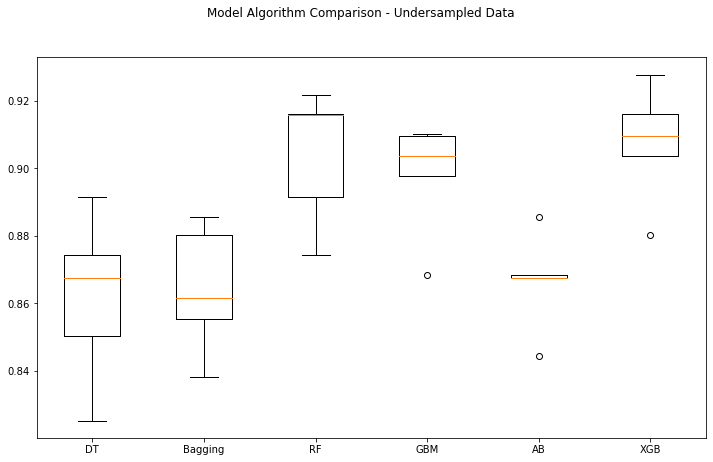

In [32]:
# Plotting boxplots for CV scores of all models
fig = plt.figure(figsize=(12,7))

fig.suptitle("Model Algorithm Comparison - Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results_u)
ax.set_xticklabels(names_u)

plt.show()

## HyperparameterTuning 

**XGBoost with Original Data**

In [33]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.8570088738186279:


In [34]:
# Creating new pipeline with best parameters
XGB = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.1,
    gamma=3
)

# Fitting model on training data
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [35]:
# Calculating metrics on training set
XGB_train = model_performance_classification_sklearn(XGB, X_train, y_train)
print("Training performance:")
XGB_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [36]:
# Calculating metrics on validation set
XGB_val = model_performance_classification_sklearn(XGB, X_val, y_val)
print("Validation performance:")
XGB_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.8,0.9,0.9


**Random Forest with Original Data**

In [37]:
Model = RandomForestClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': [200,250,300],
    'min_samples_leaf': np.arange(1, 4),
    'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt'],
    'max_samples': np.arange(0.4, 0.7, 0.1)
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


In [38]:
# Creating new pipeline with best parameters
RF = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)

# Fitting model on training data
RF.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

In [39]:
# Calculating metrics on training set
RF_train = model_performance_classification_sklearn(RF, X_train, y_train)
print("Training performance:")
RF_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.9,1.0,1.0


In [40]:
# Calculating metrics on validation set
RF_val = model_performance_classification_sklearn(RF, X_val, y_val)
print("Validation performance:")
RF_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.7,1.0,0.8


**XGBoost with Oversampled Data**

In [41]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9956240108948847:


In [42]:
# Creating new pipeline with best parameters
XGB_over = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.2,
    gamma=0
)

# Fitting model on training data
XGB_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [43]:
# Calculating metrics on training set
XGB_over_train = model_performance_classification_sklearn(XGB_over, X_train_over, y_train_over)
print("Training performance:")
XGB_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [44]:
# Calculating metrics on validation set
XGB_over_val = model_performance_classification_sklearn(XGB_over, X_val, y_val)
print("Validation performance:")
XGB_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.9,0.9,0.9


**Random Forest with Oversampled Data**

In [45]:
Model = RandomForestClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': [200,250,300],
    'min_samples_leaf': np.arange(1, 4),
    'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt'],
    'max_samples': np.arange(0.4, 0.7, 0.1)
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815078165615898:


In [46]:
# Creating new pipeline with best parameters
RF_over = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)

# Fitting model on training data
RF_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [47]:
# Calculating metrics on training set
RF_over_train = model_performance_classification_sklearn(RF_over, X_train_over, y_train_over)
print("Training performance:")
RF_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [48]:
# Calculating metrics on validation set
RF_over_val = model_performance_classification_sklearn(RF_over, X_val, y_val)
print("Validation performance:")
RF_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.9,0.9,0.9


**Bagging with Oversampled Data**

In [49]:
Model = BaggingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:


In [50]:
# Creating new pipeline with best parameters
Bg_over = BaggingClassifier(
    random_state=1,
    n_estimators=70,
    max_samples=0.9,
    max_features=0.8
)

# Fitting model on training data
Bg_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [51]:
# Calculating metrics on training set
Bg_over_train = model_performance_classification_sklearn(Bg_over, X_train_over, y_train_over)
print("Training performance:")
Bg_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [52]:
# Calculating metrics on validation set
Bg_over_val = model_performance_classification_sklearn(Bg_over, X_val, y_val)
print("Validation performance:")
Bg_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.0,0.9,0.9,0.9


**Decision Tree with Oversampled Data**

In [53]:
Model = DecisionTreeClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


In [54]:
# Creating new pipeline with best parameters
DT_over = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=3
)

# Fitting model on training data
DT_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [55]:
# Calculating metrics on training set
DT_over_train = model_performance_classification_sklearn(DT_over, X_train_over, y_train_over)
print("Training performance:")
DT_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.9,0.8,0.9


In [56]:
# Calculating metrics on validation set
DT_over_val = model_performance_classification_sklearn(DT_over, X_val, y_val)
print("Validation performance:")
DT_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.9,0.2,0.3


**XGBoost with Undersampled Data**

In [57]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9266503138301709:


In [58]:
# Creating new pipeline with best parameters
XGB_under = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5
)

# Fitting model on training data
XGB_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [59]:
# Calculating metrics on training set
XGB_under_train = model_performance_classification_sklearn(XGB_under, X_train_under, y_train_under)
print("Training performance:")
XGB_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [60]:
# Calculating metrics on validation set
XGB_under_val = model_performance_classification_sklearn(XGB_under, X_val, y_val)
print("Validation performance:")
XGB_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.3,0.4


**Random Forest with Undersampled Data**

In [61]:
Model = RandomForestClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': [200,250,300],
    'min_samples_leaf': np.arange(1, 4),
    'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt'],
    'max_samples': np.arange(0.4, 0.7, 0.1)
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:


In [62]:
# Creating new pipeline with best parameters
RF_under = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)

# Fitting model on training data
RF_under.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

In [63]:
# Calculating metrics on training set
RF_under_train = model_performance_classification_sklearn(RF_under, X_train_under, y_train_under)
print("Training performance:")
RF_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [64]:
# Calculating metrics on validation set
RF_under_val = model_performance_classification_sklearn(RF_under, X_val, y_val)
print("Validation performance:")
RF_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.5,0.6


**Gradient Boosting with Undersampled Data**

In [65]:
Model = GradientBoostingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': np.arange(100,150,25),
    'learning_rate': [0.2, 0.05, 1],
    'subsample':[0.5,0.7],
    'max_features':[0.5,0.7]
}

# Using RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9050212827357333:


In [66]:
# Creating new pipeline with best parameters
GB_under = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.5,
    learning_rate=0.2
)

# Fitting model on training data
GB_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [67]:
# Calculating metrics on training set
GB_under_train = model_performance_classification_sklearn(GB_under, X_train_under, y_train_under)
print("Training performance:")
GB_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [68]:
# Calculating metrics on validation set
GB_under_val = model_performance_classification_sklearn(GB_under, X_val, y_val)
print("Validation performance:")
GB_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.4,0.6


## Model performance comparison and choosing the final model

In [69]:
# Training performance
models_train_comp_df = pd.concat(
    [
        XGB_train.T,
        RF_train.T,
        XGB_over_train.T,
        RF_over_train.T,
        Bg_over_train.T,
        DT_over_train.T,
        XGB_under_train.T,
        RF_under_train.T,
        GB_under_train.T,
    ],
    axis=1
)

models_train_comp_df.columns = [
    "XGBoost",
    "Random Forest",
    "XGBoost_O",
    "Random Forest_O",
    "Bagging_O",
    "Decision Tree_O",
    "XGBoost_U",
    "Random Forest_U",
    "Gradient Boosting_U",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost,Random Forest,XGBoost_O,Random Forest_O,Bagging_O,Decision Tree_O,XGBoost_U,Random Forest_U,Gradient Boosting_U
Accuracy,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,1.0
Recall,1.0,0.9,1.0,1.0,1.0,0.9,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0


In [70]:
# Validation performance
models_val_comp_df = pd.concat(
    [
        XGB_val.T,
        RF_val.T,
        XGB_over_val.T,
        RF_over_val.T,
        Bg_over_val.T,
        DT_over_val.T,
        XGB_under_val.T,
        RF_under_val.T,
        GB_under_val.T,
    ],
    axis=1
)

models_val_comp_df.columns = [
    "XGBoost",
    "Random Forest",
    "XGBoost_O",
    "Random Forest_O",
    "Bagging_O",
    "Decision Tree_O",
    "XGBoost_U",
    "Random Forest_U",
    "Gradient Boosting_U",
]
    
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost,Random Forest,XGBoost_O,Random Forest_O,Bagging_O,Decision Tree_O,XGBoost_U,Random Forest_U,Gradient Boosting_U
Accuracy,1.0,1.0,1.0,1.0,1.0,0.8,0.9,0.9,0.9
Recall,0.8,0.7,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Precision,0.9,1.0,0.9,0.9,0.9,0.2,0.3,0.5,0.4
F1,0.9,0.8,0.9,0.9,0.9,0.3,0.4,0.6,0.6


- All models were tuned using RandomizedSearchCV.
- The decision tree model using oversampled data gives the best performance with not overfitting in the training set and giving the same accuracy and recall score in the validation set. The precision and F1 scores are quite low in the validation set compared to the training set, however, recall is the main metric that is being measured.

### Test set final performance

In [71]:
DT_test = model_performance_classification_sklearn(DT_over, X_test, y_test)
print("Test performance:")
DT_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.8,0.2,0.3


- The decision tree oversampled model shows similar performance to that in the validation set, with higher accuracy and recal scores, and low precision and F1 scores.

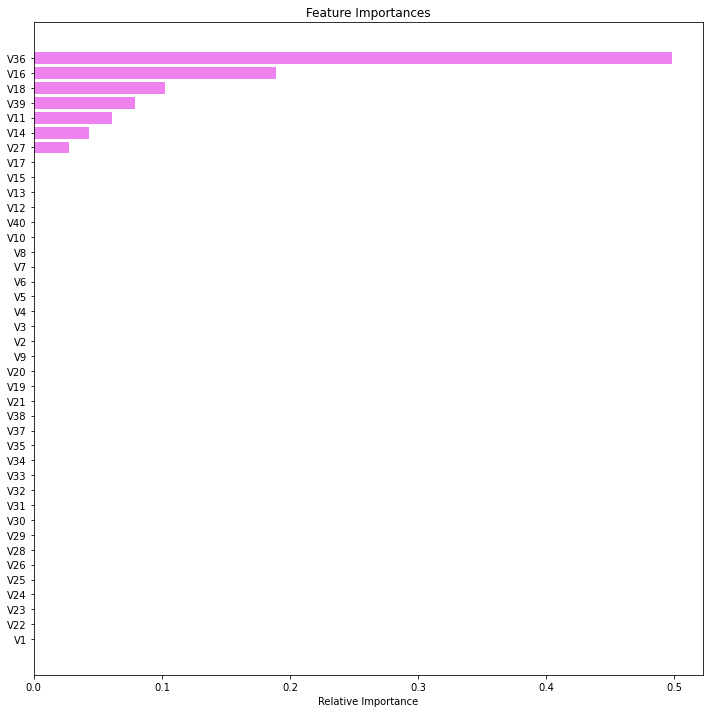

In [72]:
feature_names = X_train.columns
importances = DT_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- V36 variable shows to have the most importance in failures, followed by V16 and V18.

## Pipelines to build the final model


In [73]:
# Separating target variable and other variables for train data
X1 = df.drop("Target", axis=1)
Y1 = df["Target"]

# Separating target variable and other variables for test data
X_test1 = df.drop("Target", axis=1)
Y_test1 = df["Target"]

In [74]:
# Creating pipeline
Model = Pipeline(
    steps=[
        ('imputer',SimpleImputer()),
        (
            "DT",
            DecisionTreeClassifier(
            random_state=1,
            min_samples_leaf=7,
            min_impurity_decrease=0.001,
            max_leaf_nodes=15,
            max_depth=3
        ),
        ),
    ]
)

In [75]:
# Treating missing values
imputer = SimpleImputer(strategy='median')
X1 = imputer.fit_transform(X1)

In [76]:
# Oversampling the data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [77]:
# Fit the model on training data
Model.fit(X_over1, y_over1)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('DT',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=7, random_state=1))])

In [78]:
# Checking performance on test set
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,1.0,0.9,0.6,0.7


# Business Insights and Conclusions

### Final Model, Performance & Important Features
- The final model chosen is the decision tree model using oversampled data as it gives the best performance while not overfitting the training set, and giving the same accuracy and recall score in the validation set. The precision and F1 scores are quite low in the validation set compared to the training set, however, the test set performs better than the validation set overall, giving a recall score of 0.9, and higher accuracy, precision and F1 scores.
- Analysis shows that the most important features and top three to consider for maintenance are the V36, V16 and V18 variables.

### Observations & Insights
- All variables seem to follow a normal distribution pattern, with 0 being the average value for majority of the sensor variables.
- There are some outliers on the lower and upper ends consistent across all the variables. This could show variability of each sensor which is expected, depending on the type of sensors and what they measure.
- The following variables have a high positive correlation (>=0.8):
    - V7 and V15
    - V8 and V16
    - V11 and V29
    - V16 and V21
    - V24 and V32
- The following variables have a high negative correlation (<=-0.75):
    - V2 and V14
    - V3 and V23
- From the analysis performed, failures account for 10% in the data provided.

### Recommendations & Conclusion
- It is recommended that ReneWind look into the V36 sensor more closely when considering ongoing maintenance, as it has the highest relative importance compared to any other sensors. V36, V16 and V18 may account for the majority of the replacements from failed parts and operation costs.
- Investigating what the strong negative correlations between the sensors are stated above may help the company avoid more potential failures.
- ReneWind should create a regular maintanence schedule to assure the machinery and sensors are kept in good condition, and minimize the chance of component failure in the generators.
- The above recommendations should be actioned so the company can keep on top of looking after current machinery parts, and avoid further generator failures that can lead to unnecessary repairs, operation and maintenance costs.